In [2]:
import geopandas
import matplotlib.pyplot as pyplot
from scipy import interpolate
import numpy as np
# %matplotlib inline

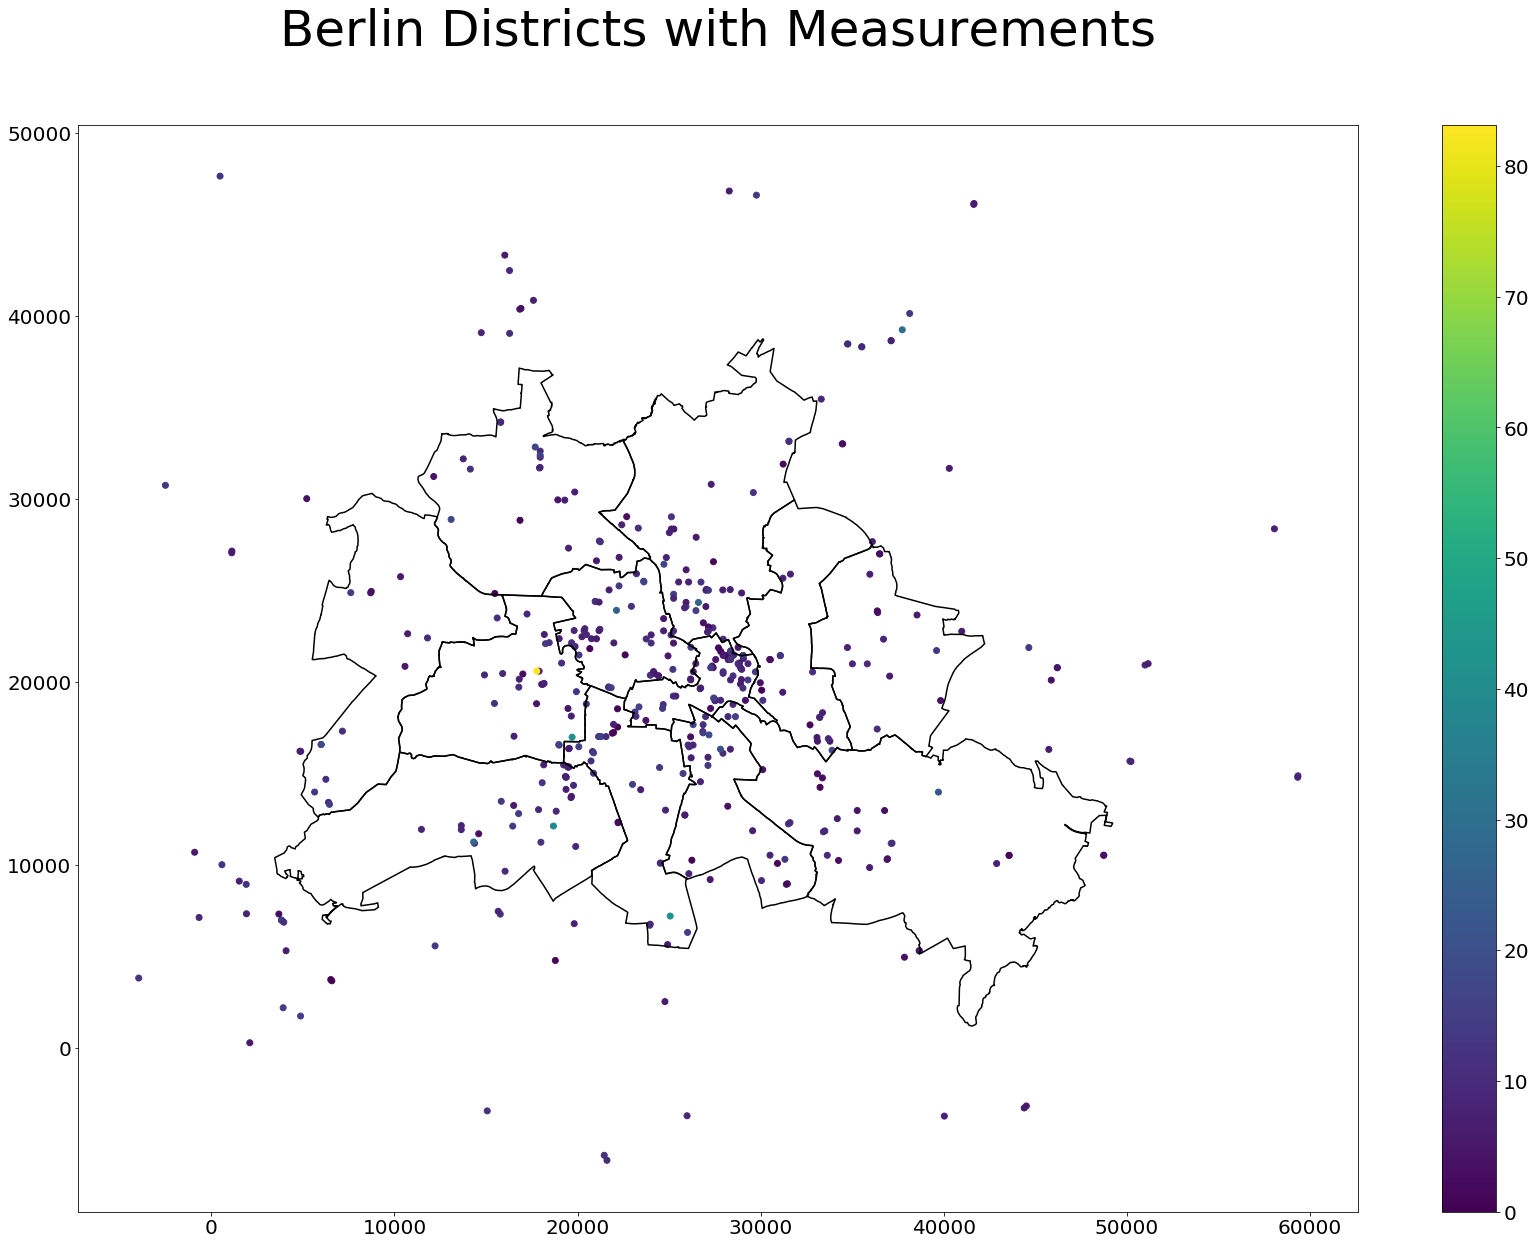

In [14]:
berlinDistricts = geopandas.read_file("../shared/berlinDistricts.geojson")
measurements = geopandas.read_file("data/data_2020-02-20T11-01-00.geojson")

berlinDistricts = berlinDistricts.to_crs(epsg=3068)
measurements = measurements.to_crs(epsg=3068)

pyplot.rcParams['figure.figsize'] = 30, 20
pyplot.rcParams['font.size'] = 20
pyplot.rcParams['axes.titlesize'] = 50
pyplot.rcParams['axes.titlepad'] = 80

berlinPlot = berlinDistricts.boundary.plot(edgecolor="black")
berlinPlot.set_title("Berlin Districts with Measurements")

measurements.plot(ax=berlinPlot, column="value", legend=True)


In [ ]:
berlinPlot.figure.savefig("measurements-in-berlin.png")

Error: Jupyter notebook failed to launch. 
Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 0
Failed to run jupyter as observable with args notebook --no-browser --notebook-dir=C:\Users\Mazel\AppData\Local\Temp\71421e85-8ad8-441b-b434-86737db70a01 --config=C:\Users\Mazel\AppData\Local\Temp\71421e85-8ad8-441b-b434-86737db70a01\jupyter_notebook_config.py --NotebookApp.iopub_data_rate_limit=10000000000.0


In [82]:
x = measurements.geometry.x
y = measurements.geometry.y
values = measurements.value

xmin, ymin, xmax, ymax = measurements.total_bounds
xnew = np.linspace(xmin, xmax, 100)
ynew = np.linspace(ymin, ymax, 100)

interpolator = interpolate.interp2d(x, y, values, kind="cubic")

valuesnew = interpolator(xnew, ynew)

print(type(berlinPlot))
iPlot = berlinPlot.pcolormesh(xnew, ynew, valuesnew)
# pyplot.plot(berlinPlot)
print(type(iPlot))

# pyplot.colorbar()
pyplot.show()


<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.collections.QuadMesh'>


In [3]:
import rasterio
import rasterio.features
import rasterio.warp

with rasterio.open('interpolation.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[12.98, 52.754], [12.98, 52.272], [13.910215, 52.272], [13.910215, 52.754], [12.98, 52.754]]]}
